In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pycta.portfolio import Portfolio
from pycta.analysis import Analysis
from pycta.signal import *


In [2]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
mu = np.tanh(prices.apply(returns_adjust, com=32, clip=4.2).cumsum().apply(osc))
vola = prices.pct_change().ewm(com=32, min_periods=32).std()

# compute the series of Euclidean norms by compute the sum of squares for each row
euclid_norm = np.sqrt((mu*mu).sum(axis=1))

# Divide each column of mu by the Euclidean norm
risk_scaled = mu.apply(lambda x: x/euclid_norm, axis=0)

portfolio = Portfolio(prices=prices, position=risk_scaled/vola)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                         17.09
Annua Volatility                     16.03
Annua Sharpe Ratio (r_f = 0)          1.07
Max Drawdown                         42.01
Return                          227,586.69
Kurtosis                              3.44
dtype: object

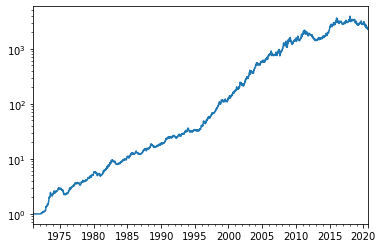

In [5]:
a.nav.plot(logy=True)
plt.show()

In [6]:
a.monthlytable

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,STDev,YTD
Year,,,,,,,,,,,,,,
2020,2.95%,-4.80%,-4.50%,2.22%,-5.42%,-2.92%,-2.39%,-6.35%,,,,,12.05%,-19.70%
2019,-9.36%,-1.00%,-0.11%,3.16%,-2.72%,4.71%,3.49%,6.59%,-7.33%,-4.95%,1.49%,-1.03%,16.88%,-8.09%
2018,8.01%,-10.80%,-1.12%,2.48%,-3.81%,0.48%,0.83%,4.46%,-1.75%,-8.34%,-3.15%,2.98%,18.30%,-10.73%
2017,-1.48%,6.52%,0.98%,3.57%,3.08%,-4.06%,0.88%,-0.36%,-0.41%,8.09%,0.21%,4.67%,12.07%,23.18%
2016,8.90%,3.39%,-9.59%,-8.12%,-0.82%,7.46%,1.69%,-3.11%,3.41%,-8.32%,-1.26%,-1.96%,20.83%,-9.86%
2015,12.01%,-2.57%,9.66%,-7.42%,4.28%,-2.55%,13.36%,-4.04%,4.40%,-4.93%,9.73%,0.30%,24.95%,33.77%
2014,-1.38%,3.22%,-0.52%,3.02%,3.07%,3.74%,-4.27%,5.80%,5.56%,-1.65%,9.55%,8.55%,14.58%,39.47%
2013,-0.12%,-0.82%,2.70%,4.73%,1.54%,-3.32%,3.55%,-3.22%,0.77%,3.32%,4.96%,1.39%,9.63%,16.13%
2012,1.43%,-3.73%,-0.97%,1.39%,-1.87%,-11.04%,4.01%,-4.78%,-3.58%,-2.11%,-0.55%,-1.92%,13.11%,-21.97%


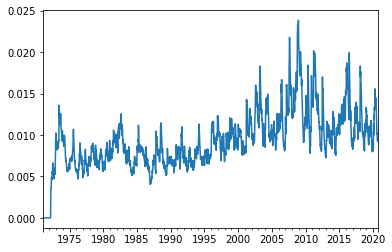

In [7]:
a.std.plot(kind="line")
plt.show()